# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow opencv-python matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os

# 2. Removing Defective Images

In [3]:
import cv2
from PIL import Image

In [9]:
data_dir = 'data'
image_exts = ['jpg', 'jpeg', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)

    if not os.path.isdir(class_path):
            continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)

        

        try:
            img = cv2.imread(image_path)

            with Image.open(image_path) as pil_img:
                tip = pil_img.format.lower() # Convert to lowercase
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path} → Detected format: {tip}')
              # os.remove(image_path)

        except Exception as e:
            print('Issue with image: {}'.format(image_path))
          # os.remove(image_path)

# 3. Loading Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 253 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


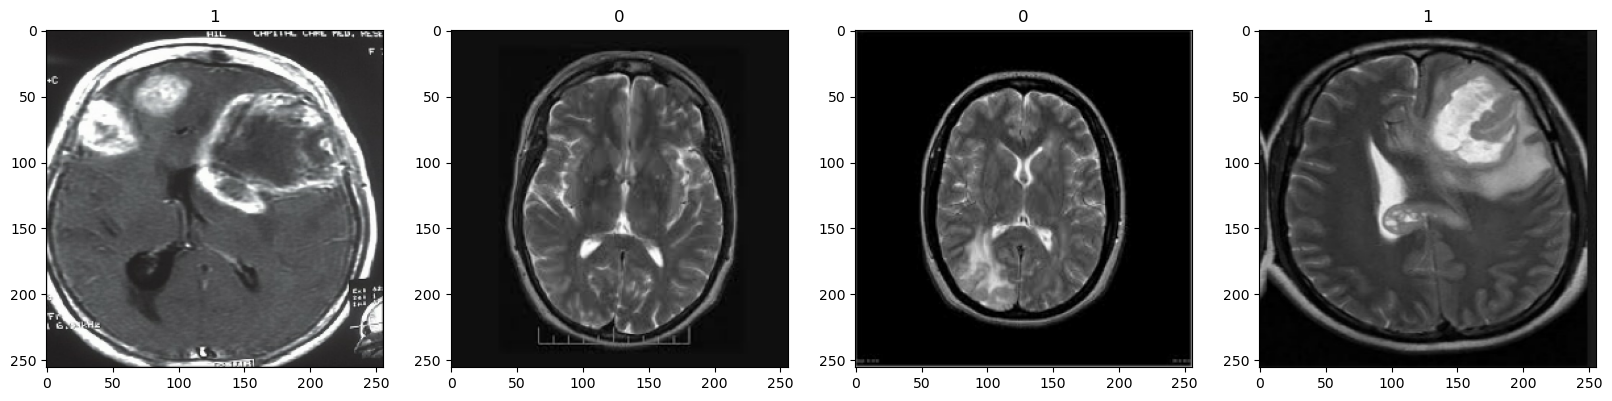

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# 5. Split Data

In [37]:
total = len(data)
train_size = int(total * 0.7) # 5
val_size = int(len(data) * .15) # 1
test_size = total - train_size - val_size # 2

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 6. Build Deep Learning Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.4639 - loss: 45.6462 - val_accuracy: 0.4062 - val_loss: 3.2299
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.6101 - loss: 2.7901 - val_accuracy: 0.8438 - val_loss: 0.3756
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.7994 - loss: 0.4152 - val_accuracy: 0.6875 - val_loss: 0.6397
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.8459 - loss: 0.4030 - val_accuracy: 0.8125 - val_loss: 0.3897
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.8687 - loss: 0.3487 - val_accuracy: 0.8750 - val_loss: 0.1982
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.9553 - loss: 0.1447 - val_accuracy: 0.9375 - val_loss: 0.2991
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.9385 - loss: 0.1568 - val_accuracy: 1.0000 - val_loss: 0.0989
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.9741 - loss: 0.1305 - val_accuracy: 0.9375 - val_loss

# 8. Plot Performance

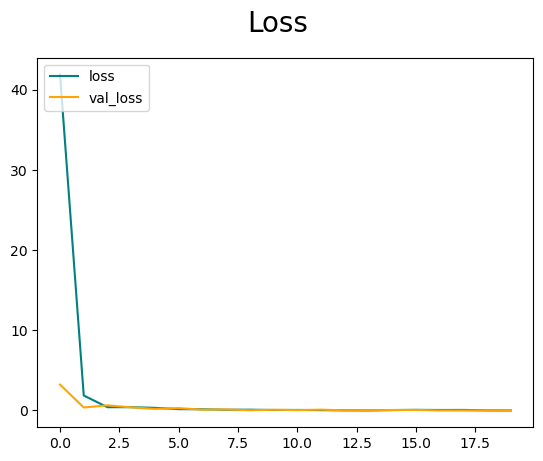

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

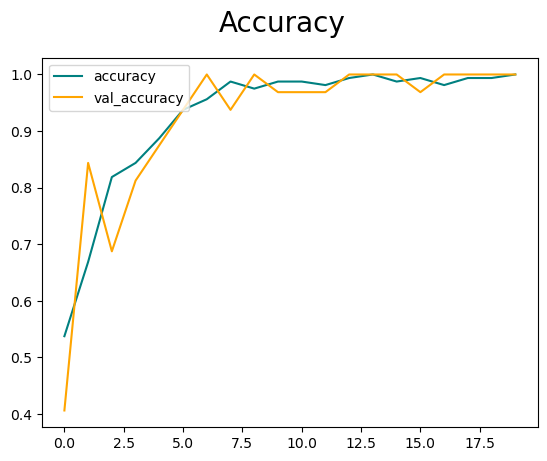

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


2025-04-09 14:26:24.019879: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [56]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

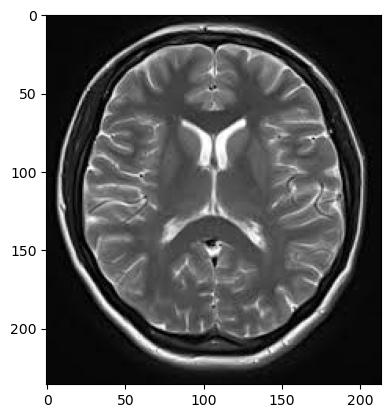

In [69]:
img = cv2.imread('data/no/No 6.jpg')
plt.imshow(img)
plt.show()

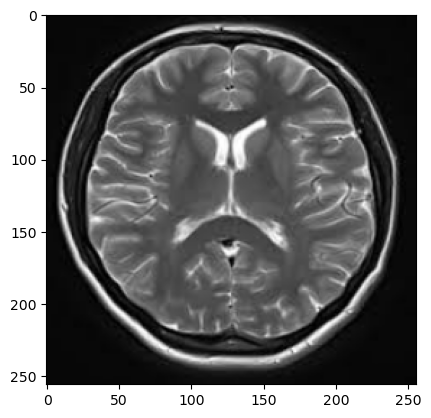

In [70]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [72]:
yhat

array([[0.48505694]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'The Predicted Class is No.')
else:
    print(f'The Predicted Class is Yes. ')

Predicted class is No


# 11. Saving The Model